In [474]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [475]:
# load the csv files
users = pd.read_csv("takehome_users.csv", encoding='latin-1')
users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [476]:
users.shape

(12000, 10)

In [477]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [478]:
users_engage = pd.read_csv("takehome_user_engagement.csv", parse_dates=['time_stamp'])
users_engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [479]:
users_engage.shape

(207917, 3)

In [480]:
users_engage.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [481]:
# check if there is null data in each dataframe
users.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [482]:
users_engage.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

Get the only date part from columns 'creation_time' & 'last_session_creation_time' (takehome_uesrs) and 'time_stamp' (takehome_users_engagement) and change the data type to datetime

In [483]:
users['creation_time'] = pd.to_datetime(users['creation_time']).dt.date
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s').dt.date
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'])

In [484]:
users_engage['time_stamp'] = pd.to_datetime(users_engage['time_stamp']).dt.date
users_engage['time_stamp'] = pd.to_datetime(users_engage['time_stamp'])

how to count if a user logs in 3 separate days in at least one seven-day period?

In [485]:
users_engage['wk'] = users_engage['time_stamp'].dt.week
users_engage = users_engage.groupby(['wk','user_id'])['time_stamp'].count().reset_index(name="freq")

#result = users_engage[users_engage.freq >= 3]

# only user ids matching criteria
#user_ids = result.user_id.tolist()
#print(user_ids)

In [486]:
users_engage.loc[users_engage.freq >= 3, 'adopted'] = 1
#users_engage.loc[users_engage.freq < 3, 'adopted'] = 0

In [487]:
users_engage.drop(columns=['wk'], inplace=True)

In [488]:
users_engage.head()

,user_id,freq,adopted
0,2,1,NaN
1,10,5,1.0
2,42,4,1.0
3,43,1,NaN
4,46,1,NaN


In [489]:
users_engage.loc[users_engage.user_id==2]

,user_id,freq,adopted
0,2,1,NaN
1152,2,1,NaN
5943,2,3,1.0
7213,2,2,NaN
11049,2,1,NaN
12351,2,1,NaN
16449,2,1,NaN
49641,2,1,NaN
51726,2,1,NaN
53868,2,1,NaN


In [490]:
# Use groupby to remove duplicated combination of 'user_id' and 'adopted'
users_engage = users_engage.groupby(['user_id', 'adopted']).size().reset_index().rename(columns={0:'count'})
users_engage.head()

,user_id,adopted,count
0,2,1.0,1
1,10,1.0,46
2,20,1.0,1
3,33,1.0,1
4,42,1.0,51


In [491]:
# drop the column 'count'
users_engage.drop(columns=['count'], inplace=True)

In [492]:
# rename the column 'user_id' for full join
users_engage = users_engage.rename(columns={'user_id': 'object_id'})
users_engage.head()

,object_id,adopted
0,2,1.0
1,10,1.0
2,20,1.0
3,33,1.0
4,42,1.0


In [493]:
# Full join
users_merged = pd.merge(users, users_engage, on='object_id', how='outer')

In [494]:
users_merged.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22,1,0,11,10803.0,NaN
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31,0,0,1,316.0,1.0
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19,0,0,94,1525.0,NaN
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22,0,0,1,5151.0,NaN
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22,0,0,193,5240.0,NaN
5,6,2013-12-17,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19,0,0,197,11241.0,NaN
6,7,2012-12-16,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20,0,1,37,NaN,NaN
7,8,2013-07-31,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,NaN
8,9,2013-11-05,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,NaN
9,10,2013-01-16,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03,1,1,318,4143.0,1.0


In [495]:
# fill the null values in column 'adopted' with 0 as these null values mean 'not adopted'
users_merged['adopted'].fillna(0, inplace=True)

In [496]:
users_merged.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22,1,0,11,10803.0,0.0
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31,0,0,1,316.0,1.0
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19,0,0,94,1525.0,0.0
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22,0,0,1,5151.0,0.0
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22,0,0,193,5240.0,0.0
5,6,2013-12-17,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19,0,0,197,11241.0,0.0
6,7,2012-12-16,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20,0,1,37,NaN,0.0
7,8,2013-07-31,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0.0
8,9,2013-11-05,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0.0
9,10,2013-01-16,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03,1,1,318,4143.0,1.0


In [497]:
users_merged.shape

(12000, 11)

Now we have which users have logged into the product on three separate days in at least one seven-day period.

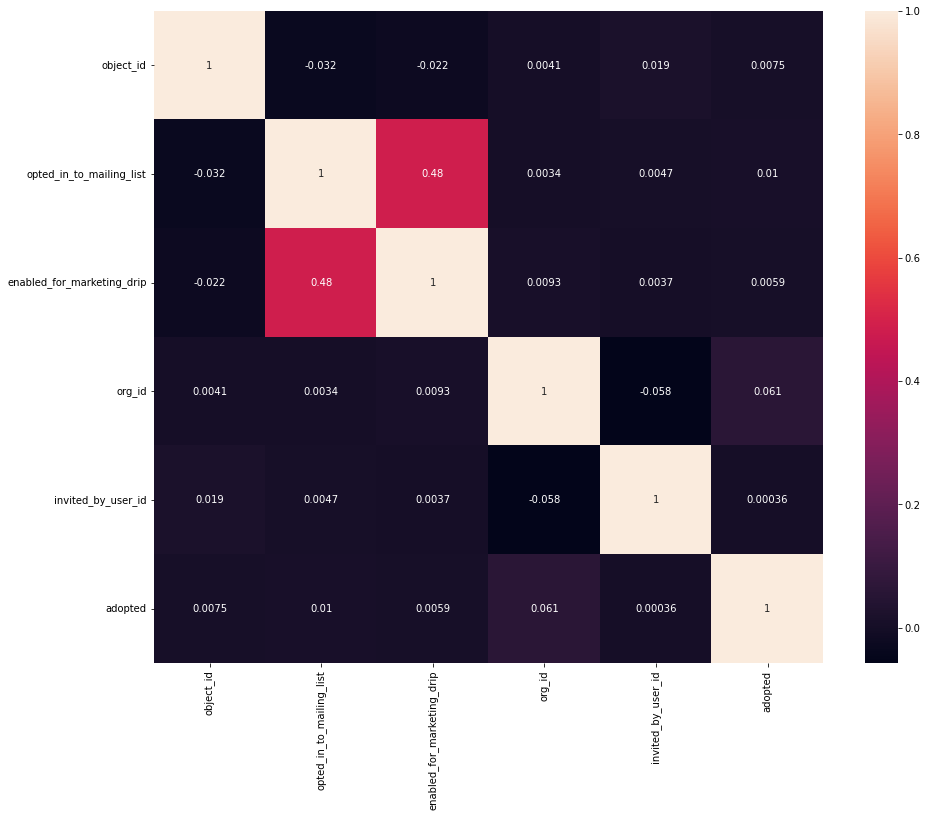

In [498]:
# plot heatmap to see the correlations between columns
plt.figure(figsize=(15, 12))
correlation = users_merged.corr()
sns.heatmap(correlation, annot=True)

The org_id (organization ID) seems the most effective feature to predict user adoption, followed by 'opted_in_to_mailing_list'.  
However, the correlations are very low so it is hard to tell that they are actually effective, which means there seems no significant factor that predict user adoption.